In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###### 설치 패키지

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

In [ ]:
!pip uninstall tensorflow
!pip uninstall keras
!pip install tensorflow==1.14

In [ ]:
cd /content/drive/Shareddrives/capstone/Elegant_Friends/src/clustering/Mecab-ko-for-Google-Colab/

/content/drive/Shareddrives/capstone/Elegant_Friends/src/clustering/Mecab-ko-for-Google-Colab


In [ ]:
!bash install_mecab-ko_on_colab190912.sh
!pip install pyLDAvis==3.2.2
!pip install jamo

- Mecab 사용자 사전에 단어 추가하기

In [ ]:
cd /content/mecab-ko-dic-2.1.1-20180720

/content/mecab-ko-dic-2.1.1-20180720


In [ ]:
!python /content/drive/Shareddrives/capstone/Elegant_Friends/src/clustering/add_vocab.py
!bash ./tools/add-userdic.sh
!make install

generating userdic...
nnp.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/nnp.csv ... 
done!
person.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/person.csv ... 
done!
place.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/place.csv ... 
done!
test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########################################| 
reading ./Place-address.csv ... 19301
reading ./J.csv ... 416
reading ./Foreign.csv ... 11690
reading 

- 추가한 단어 우선순위 조정하기 (0으로 설정)

In [ ]:
!python /content/drive/Shareddrives/capstone/Elegant_Friends/src/clustering/reset_priority.py 
!make clean
!make install

test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########################################| 
reading ./Place-address.csv ... 19301
reading ./J.csv ... 416
reading ./Foreign.csv ... 11690
reading ./EP.csv ... 51
reading ./MAG.csv ... 14242
reading ./Hanja.csv ... 125750
reading ./EC.csv ... 2547
reading ./XR.csv ... 3637
reading ./XSN.csv ... 124
reading ./Place-station.csv ... 1145
reading ./user-nnp.csv ... 20
reading ./Wikipedia.csv ... 36762
reading ./XSA.csv ... 19
reading ./user-person.csv ... 1
reading ./Place.csv ... 30303
reading ./VCP.csv ... 9
reading ./NNG.csv ... 208524
reading ./ETM.csv ... 133
reading ./Person-actor.csv ... 99230
reading ./NNBC.csv ... 677
reading ./Person.csv ... 196459
reading ./VCN.csv ... 7
reading ./VA.csv ... 2360
reading ./NNB.csv ... 140
reading ./Preanalysis.csv

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.nouns('인증번호'))

['인증번호']


- pyLDA 필요한 모듈 및 함수

In [ ]:
from gensim.models.ldamodel import LdaModel
import logging
import pickle
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import argparse
from gensim.models.ldamodel import LdaModel
import pandas as pd
import pyLDAvis.gensim as gensimvis
import pyLDAvis


class Documents:
    def __init__(self, path):
        self.path = path

    def __iter__(self):
        with open(self.path, encoding='utf-8') as f:
            for doc in f:
                yield doc.strip().split()


class Corpus:
    def __init__(self, path, dictionary):
        self.path = path
        self.dictionary = dictionary
        self.length = 0

    def __iter__(self):
        with open(self.path, encoding='utf-8') as f:
            for doc in f:
                yield self.dictionary.doc2bow(doc.split())

    def __len__(self):
        if self.length == 0:
            with open(self.path, encoding='utf-8') as f:
                for i, doc in enumerate(f):
                    continue
            self.length = i + 1
        return self.length


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """ Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 40;
    start = 2;
    step = 6;

    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data,
                                                            start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


#1. 리뷰데이터 수집

In [ ]:
!python /content/drive/Shareddrives/capstone/Elegant_Friends/src/crawling/playstore_crawling.py \
--input_url='https://play.google.com/store/apps/details?id=com.lguplus.mobile.cs&hl=ko&gl=KR&showAllReviews=true' \
--file_name=test \
--year=2020 \
--quarter=4 \
--only=True \

총 리뷰 수: 888


#2. 감성 분류 (긍/부정 라벨링)

In [ ]:
!python /content/drive/Shareddrives/capstone/Elegant_Friends/src/ELBERT/make_bert_model/run_classifier.py \
--task_name=asrc \
--do_predict=true \
--data_dir=/content/drive/Shareddrives/capstone/Elegant_Friends/rsc/crawling_data \
--vocab_file=/content/drive/Shareddrives/capstone/Elegant_Friends/rsc/ELBERT_data/conf/vocab.txt \
--bert_config_file=/content/drive/Shareddrives/capstone/Elegant_Friends/rsc/ELBERT_data/conf/bert_config.json \
--init_checkpoint=/content/drive/Shareddrives/capstone/Elegant_Friends/rsc/ELBERT_data/fine_tuned_model/trained_ELBERT/model.ckpt-1079 \
--output_dir=/content/drive/Shareddrives/capstone/Elegant_Friends/rsc/ELBERT_data/sentiment_analyzed \

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
!python /content/drive/Shareddrives/capstone/Elegant_Friends/src/ELBERT/make_bert_model/test_to_result.py \
--train=False \

#3. 토픽 군집화

- 단어 치환 및 tokenizing 하기

In [ ]:
!python /content/drive/Shareddrives/capstone/Elegant_Friends/src/clustering/tokenizing.py \
--file_name=service_center

전체 개수: 888
부정 개수: 452
/content/drive/Shareddrives/capstone/Elegant_Friends/src/clustering/tokenizing.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative['text'] = negative['text'].str.replace(word, key)


- corpus 및 dictionary 생성

In [ ]:
!python /content/drive/Shareddrives/capstone/Elegant_Friends/src/clustering/make_corpus_dict.py \
--file_name=service_center \
--min_count=7 \

dictionary size : 29


- 최적의 토픽 수 찾기

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fro

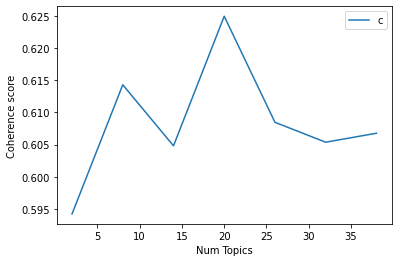

In [ ]:
fname='service_center'
with open('/content/drive/Shareddrives/capstone/Elegant_Friends/rsc/clustering_data/'+fname+'/pickle/corpus.pickle', 'rb') as f:
    corpus = pickle.load(f)
with open('/content/drive/Shareddrives/capstone/Elegant_Friends/rsc/clustering_data/'+fname+'/pickle/dictionary.pickle', 'rb') as f2:
    dictionary = pickle.load(f2)
with open('/content/drive/Shareddrives/capstone/Elegant_Friends/rsc/clustering_data/'+fname+'/pickle/documents.pickle', 'rb') as f3:
    documents = pickle.load(f3)
    

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# 최적의 토픽 수 찾기
find_optimal_number_of_topics(dictionary, corpus, documents)

In [ ]:
#LDA 학습
n_topics = 6

lda_model = LdaModel(corpus, id2word=dictionary, num_topics=n_topics)
topics = lda_model.print_topics(num_words=10)

prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(prepared_data)

2021-05-25 10:27:03,329 : INFO : using symmetric alpha at 0.16666666666666666
2021-05-25 10:27:03,339 : INFO : using symmetric eta at 0.16666666666666666
2021-05-25 10:27:03,341 : INFO : using serial LDA version on this node
2021-05-25 10:27:03,343 : INFO : running online (single-pass) LDA training, 6 topics, 1 passes over the supplied corpus of 451 documents, updating model once every 451 documents, evaluating perplexity every 451 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-25 10:27:03,346 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/u

###### 기타

In [ ]:
!python /content/drive/Shareddrives/capstone/Elegant_Friends/src/clustering/find_optimal_n.py \
--file_name=service_center \

In [ ]:
!python /content/drive/Shareddrives/capstone/Elegant_Friends/src/clustering/pyLDAvis.py \
--file_name=service_center \
--optimal_n=6 \
--year=2020 \
--quarter=4 \

Traceback (most recent call last):
  File "/content/drive/Shareddrives/capstone/Elegant_Friends/src/clustering/pyLDAvis.py", line 3, in <module>
    import pyLDAvis.gensim as gensimvis
  File "/content/drive/Shareddrives/capstone/Elegant_Friends/src/clustering/pyLDAvis.py", line 3, in <module>
    import pyLDAvis.gensim as gensimvis
ModuleNotFoundError: No module named 'pyLDAvis.gensim'; 'pyLDAvis' is not a package


#4. 시각화

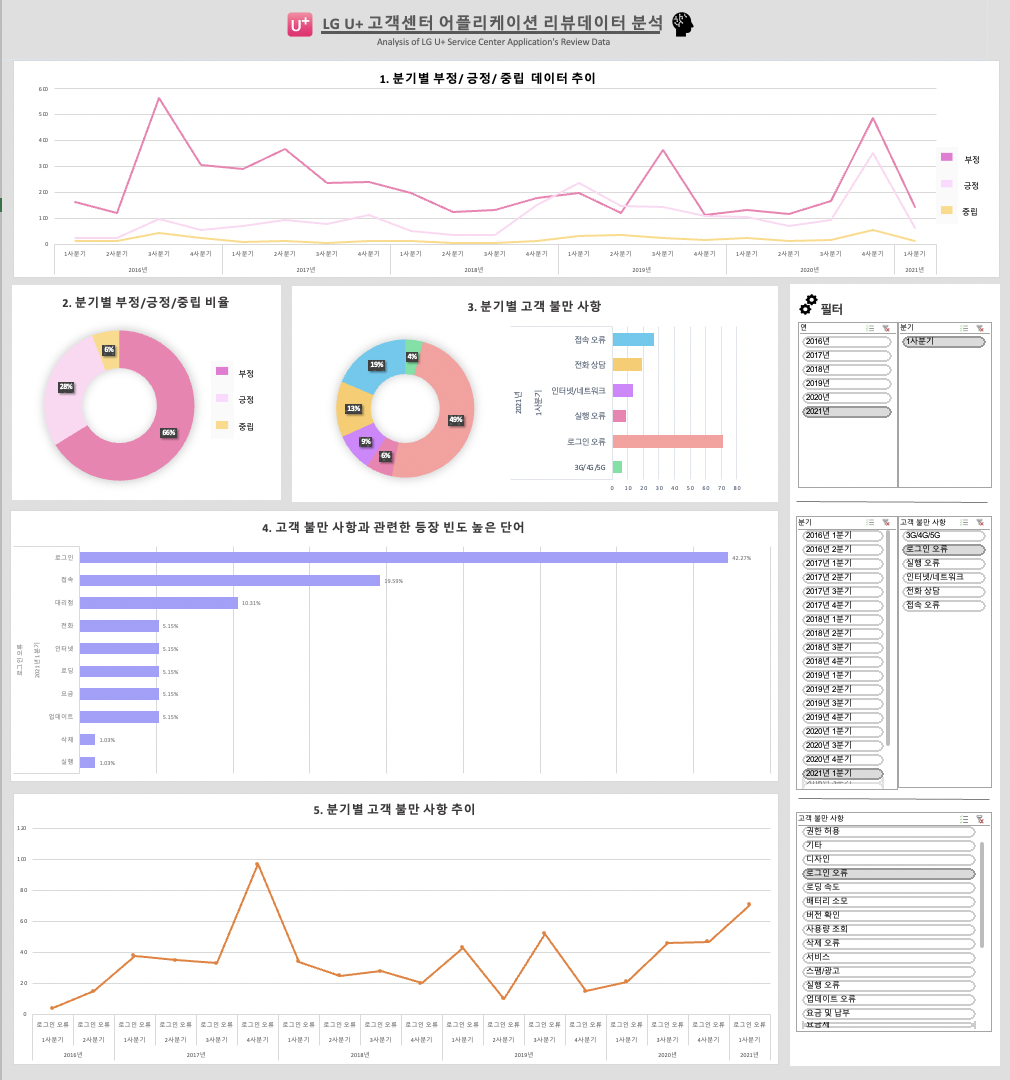

In [ ]:
from IPython.display import Image
Image('/content/drive/Shareddrives/capstone/Elegant_Friends/visualization/service_center_대시보드.png')